  # ECE 321: Continuous-Time Signals and Systems #
 ### Spring 2025 ###
 ### Lab 6 ###


 ### Due Date ###

Refer to the ECE 321 Laboratory Schedule for your section to determine the report due date. Submit via Canvas. </font>

 ### Description ###
The purpose of this lab is to enhance your understanding of Laplace transform and frequency response. Such
understanding helps to investigate the behavior of LTI systems.

## Problem 1.
 Consider four different LTI systems in (a)-(d) below. For each of the systems in (a) - (d), do the following:

    • determine whether it is stable. Explain your reasoning.

    • determine whether it is lowpass, bandpass or high-pass. Explain your rationale.

    • verify your results by plotting its frequency response by Python.


a) The system transfer function H(s) has two poles at $p_{1,2} = −1 ± j$ and two zeros at $z_{1,2} = 0$.


Stability: A system is stable if all its poles are in the left half of the complex plane.

Note: Having a pole at the origin often indicates a low-pass characteristic since the response at DC ($\omega=0$) is infinite or very high.

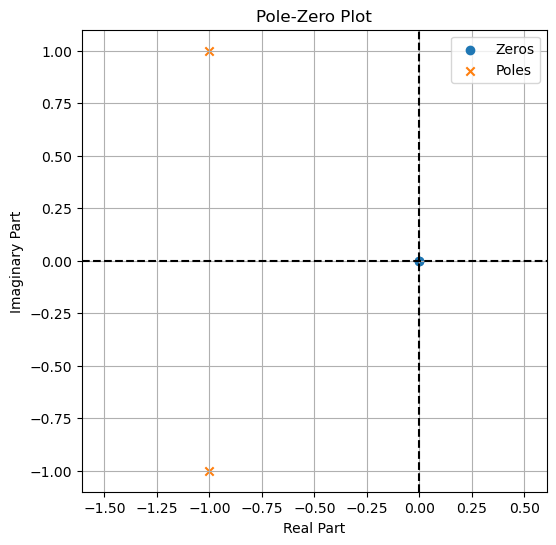

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Poles are at -1 ± j
# Zeros are both at 0
poles = [-1 + 1j, -1 - 1j]
zeros = [ 0, 0] 

# Plot the pole-zero map
plt.figure(figsize=(6, 6))
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', label='Poles')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Pole-Zero Plot')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()


Stability: Stable; All poles have negative real parts as they are in LHS of s-plane (Re{p1,2} = -1). Hence, system is STABLE.




Filter type: High Pass Filter; 

H(s) = s^2 / [(s+1-i)(s+1-i)] = s^2/(s^2+2s+2) which means H(0) = 0 and H(inf) = 1 which says magnitude starts at 0 at low frequencies and approaches 1 at high frequencies which meakes this system a HPF.



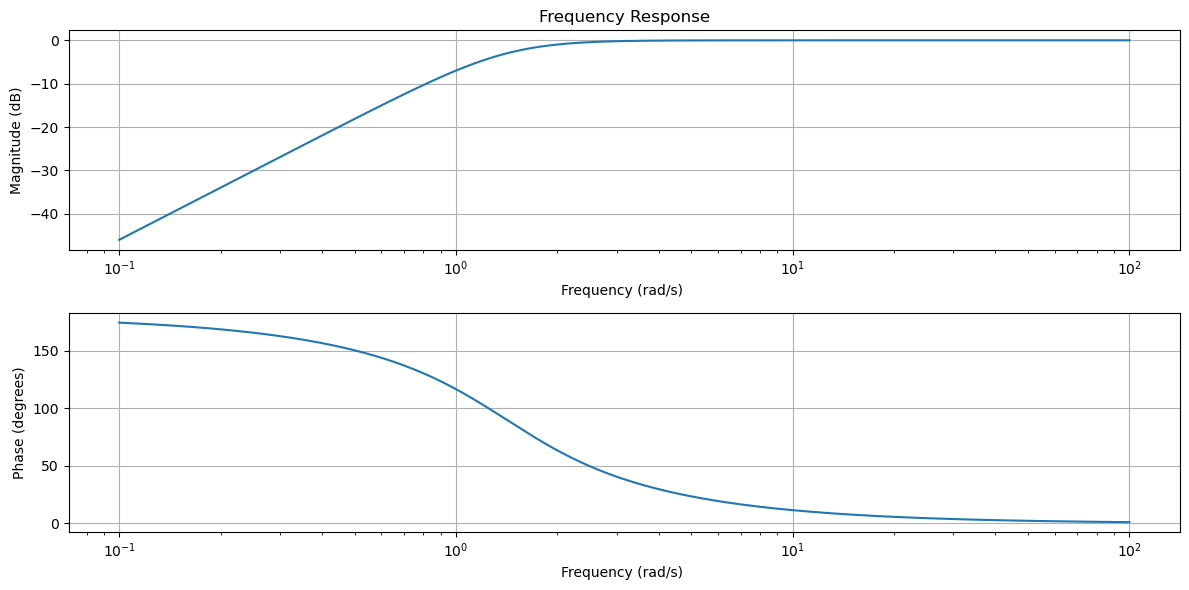

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the poles as specified
poles = [-1 + 1j, -1 - 1j]

# Coefficients of the numerator of the transfer function
numerator_poly = [1, 0, 0] # (Gives double zero at the origin)

# The denominator polynomial is the product of (s - pole) for each pole
denominator_poly = np.poly(poles)

# Compute the frequency response
w, H = signal.freqs(numerator_poly, denominator_poly, worN=np.logspace( -1, 2,1000 ))
# Plot the frequency response
plt.figure(figsize=(12, 6))

# Magnitude plot
plt.subplot(211)
plt.semilogx(w, 20 * np.log10(np.abs(H)))
plt.title('Frequency Response')
plt.xlabel('Frequency (rad/s) ')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

# Phase plot
plt.subplot(212)
plt.semilogx(w, np.degrees(np.angle(H)))
plt.xlabel('Frequency (rad/s) ')
plt.ylabel('Phase (degrees)')
plt.grid(True)

plt.tight_layout()
plt.show()


b) $H(s) = \frac{s^2 + 1}{s^3 + 4s^2 + 5s + 1}$

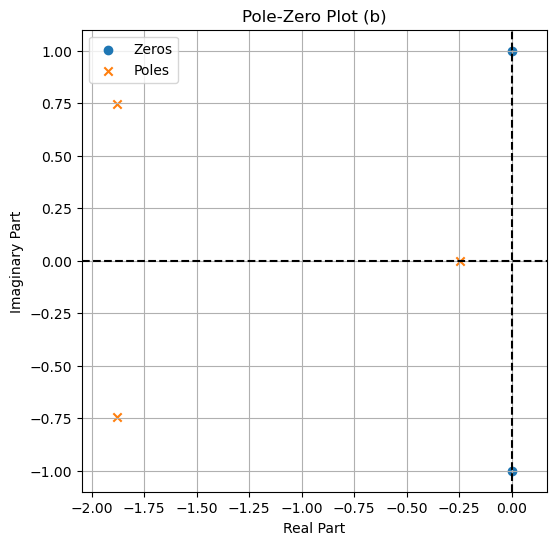

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients of the numerator and denominator of the transfer function
numerator_coeffs = [1, 0, 1]
denominator_coeffs = [1, 4, 5, 1]

# Calculate the zeros and poles of the transfer function
zeros = np.roots(numerator_coeffs)
poles = np.roots(denominator_coeffs)


# Plot the pole-zero map

plt.figure(figsize=(6, 6))
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', label='Poles')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Pole-Zero Plot (b)')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

Stability: Stable; All poles have negative real parts as they are in LHS of s-plane. Hence, system is STABLE.


Filter type: Low Pass Filter

H(0) = 1; H(inf) = 0 since degree of denominator is one more than of numertaor. Thus, system is a LPF. 

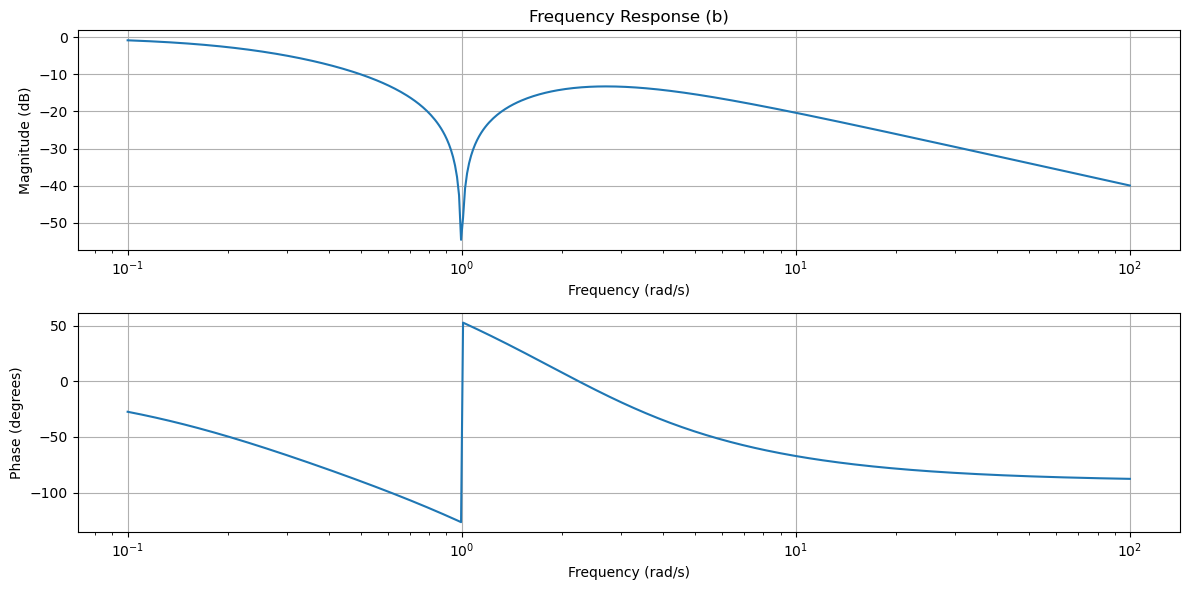

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


# Define the frequency range over which to compute the frequency response
w = np.logspace(-1, 2, 500)  # For example, from 0.1 to 100 rad/s

# Compute the frequency response
w, H = signal.freqs(numerator_coeffs, denominator_coeffs, worN=w)

# Plot the magnitude and phase of the frequency response
plt.figure(figsize=(12, 6))

# Magnitude plot
plt.subplot(211)
plt.semilogx(w, 20 * np.log10(np.abs(H)))
plt.title('Frequency Response (b)')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

# Phase plot
plt.subplot(212)
plt.semilogx(w, np.degrees(np.angle(H)))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase (degrees)')
plt.grid(True)

plt.tight_layout()
plt.show()

c) The input-output differential equation is $\frac{d^2 y(t)}{dt^2} + \frac{dy(t)}{dt} + 2y(t) = \frac{dx(t)}{dt} + \frac{1}{2}x(t)$.


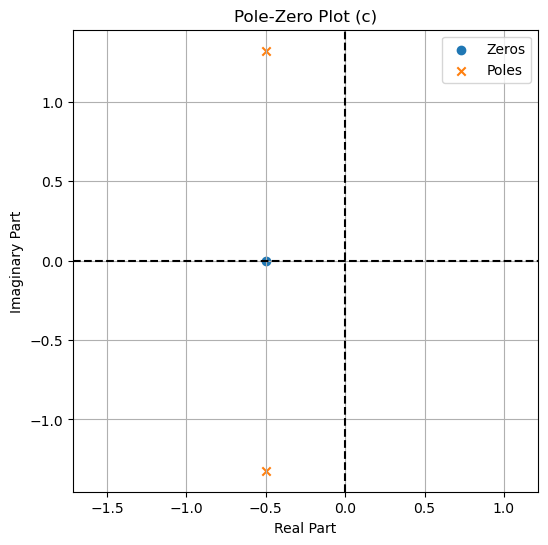

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients of the numerator and denominator of the transfer function
numerator_coeffs = [1, 0.5]
denominator_coeffs = [1, 1, 2]

# Calculate the zeros and poles of the transfer function
zeros = np.roots(numerator_coeffs)
poles = np.roots(denominator_coeffs)

# Plot the pole-zero map
plt.figure(figsize=(6, 6))
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', label='Poles')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Pole-Zero Plot (c)')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()


Stability: Stable; All poles have negative real parts as they are in LHS of s-plane. Hence, system is STABLE.


Filter type: Band Pass Filter

Y (s^2 + s + 2) = X (s + 0.5) so, H(s) = (s + 0.5)/(s^2 + s + 2)

H(0) = 0.5 / 2 = 0.25

H(1) = 1.5 / 4 = 0.325

H(inf) = 0 since degree of denominator is one more than of numertaor.

Thus, filter has its peak value occuring somewhere between lower frequencies and higher frequencies which makes it a BPF.

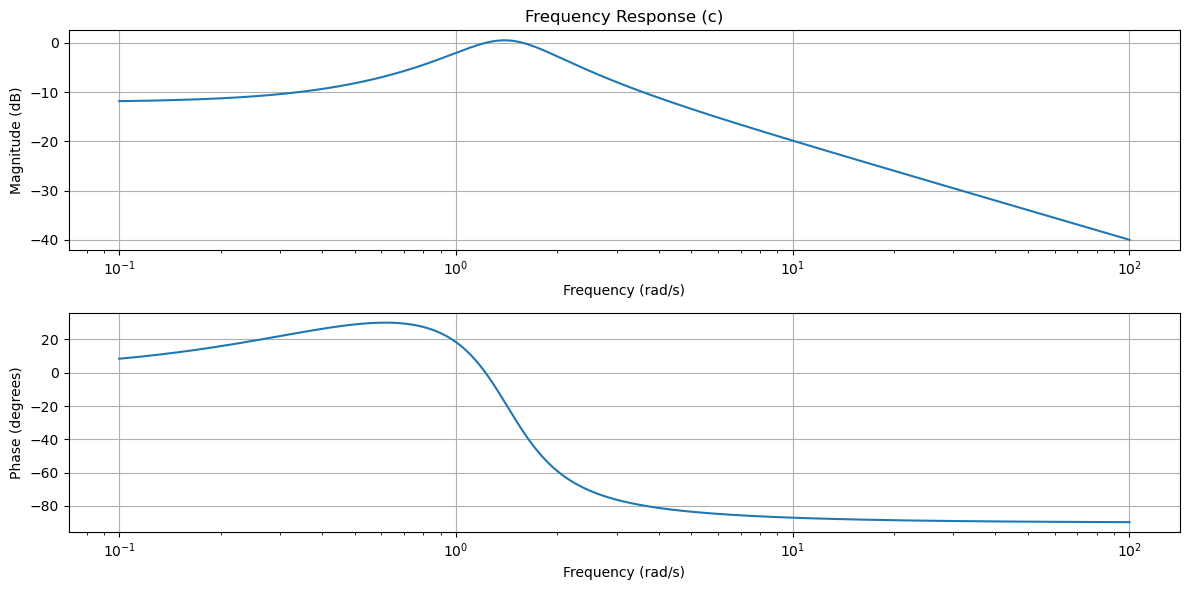

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the frequency range over which to compute the frequency response
w = np.logspace( -1,2 ,500 )  # From 0.1 to 100 rad/s

# Compute the frequency response
w, H = signal.freqs(numerator_coeffs, denominator_coeffs, worN=w)

# Plot the magnitude and phase of the frequency response
plt.figure(figsize=(12, 6))

# Magnitude plot
plt.subplot(211)
plt.semilogx(w, 20 * np.log10(np.abs(H)))
plt.title('Frequency Response (c)')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

# Phase plot
plt.subplot(212)
plt.semilogx(w, np.degrees(np.angle(H)))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase (degrees)')
plt.grid(True)

plt.tight_layout()
plt.show()


d) The impulse response is $h(t) = \delta(t) + e^{−2t}u(t)$.

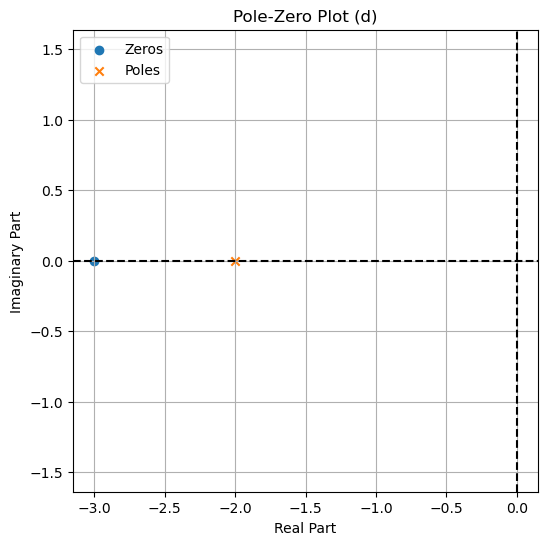

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients of the numerator and denominator of the transfer function
#
numerator_coeffs = [1, 3] 
denominator_coeffs = [1, 2]

# Calculate the zeros and poles of the transfer function
zeros_impulse = np.roots(numerator_coeffs)
poles_impulse = np.roots(denominator_coeffs)

# Plot the pole-zero map
plt.figure(figsize=(6, 6))
plt.scatter(np.real(zeros_impulse), np.imag(zeros_impulse), marker='o', label='Zeros')
plt.scatter(np.real(poles_impulse), np.imag(poles_impulse), marker='x', label='Poles')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Pole-Zero Plot (d)')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()


Stability: Stable; the pole has a negative real part of -2 so the system is stable




Filter type: Low Pass Filter

H(s) = 1 + 1/(s+2) = (s+3)/(s+2)

H(0) = 1.5

H(1) = 1.333

H(2) = 1.25

H(3) = 1.2

H(8) = 1.1

H(inf) = 1

So, LPF as magnitude decreases with frequency.

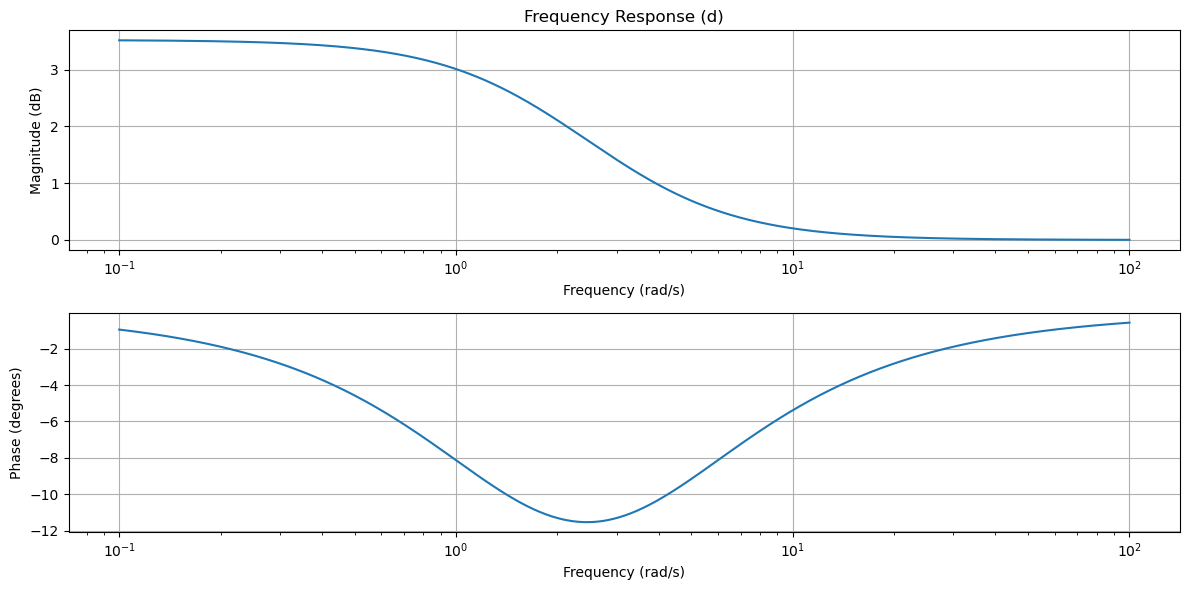

In [15]:
# Compute the frequency response
w_impulse, H_impulse = signal.freqs(numerator_coeffs , denominator_coeffs, worN=np.logspace(-1, 2, 500) )

# Plot the frequency response
plt.figure(figsize=(12, 6))

# Magnitude plot
plt.subplot(211)
plt.semilogx(w_impulse, 20 * np.log10(np.abs(H_impulse)))
plt.title('Frequency Response (d)')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

# Phase plot
plt.subplot(212)
plt.semilogx(w_impulse, np.degrees(np.angle(H_impulse)))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase (degrees)')
plt.grid(True)

plt.tight_layout()
plt.show()


## Problem 2.


We now investigate the behavior of a 2nd-order system model for an automobile suspension system.
Consider a simple one-dimensional model of an automobile suspension system shown in Figure 1. This system
is similarly described in Fig. 6.21 of the textbook and analyzed in Section 6.5.2. The system model is given by

$ \frac{d^2y(t)}{dt^2} + 2\zeta \omega_n \frac{dy(t)}{dt} + \omega_n^2 y(t) = 2\zeta \omega_n \frac{dx(t)}{dt} + \omega_n^2 x(t) $

where: $ \omega_n = \sqrt{\frac{K}{M}} $ and $\zeta = \frac{B}{2\sqrt{KM}}$. Here $K$ is the spring constant, $B$ is the dashpot viscosity, and $M$ indicates vehicle weight. Their values affect the performance of the system. We assume that M = 1 for this project.

a) Determine the analytical expression for the frequency response $H(j\omega)$ of the system. What is the value of $H(j\omega)$ when $ \omega = 0$ ?

H(s) = Y(s) / X(s) = ($ 2\zeta \omega_n s + \omega_n^2 $) / ($ s^2 + 2\zeta \omega_n s + \omega_n^2 ) $

Thus, H(0) = ($ 0+ \omega_n^2 $) / ($ 0^2 + 0 + \omega_n^2 ) $ 

Which means:

H(0) = ($ \omega_n^2 $) / ($ \omega_n^2 ) $ = 1

b) Determine the poles and zeros of this system in terms of $\omega_n$ and $\zeta$. What type of frequency response characteristic do you expect this system to have? Will it act as a lowpass, highpass, or bandpass filter?

Zero: Numerator = 0

$ 2\zeta \omega_n s + \omega_n^2 $ = 0

s = - $ \omega_n^2 $ / $ 2\zeta \omega_n $ = - $ \omega_n $ / $ 2\zeta $ 


Poles: Denomerator = 0

$ s^2 + 2\zeta \omega_n s + \omega_n^2  $ = 0

Solving quadratic equation:

s = - $ \zeta \omega_n $ - $\omega_n$ sqrt($ \zeta^2 $ -1)

s = - $ \zeta \omega_n $ + $\omega_n$ sqrt($ \zeta^2 $ -1)

As for our expectation of system behaviour, the nature of the poles depends on $ \zeta $, so that:

if $ \zeta $ > 1: poles are real and distinct


if $ \zeta $ = 1: the poles are real and repeated


if 0< $ \zeta $ < 1: poles are complex conjugates


We saw that H(0) = 1 and H(inf) = 0 since deg{denom} > deg{ num }.

This means system passes low frequencies and attenuates high frequencies, it acts as a Low Pass Filter.


c) Let us assume $\zeta = \sqrt{2}$ . you will vary the value of K (hence you will vary $ \omega_n $) and observe how the system
characteristics change in terms of the rise time.
Consider 3 values of K: 0:09; 1:0, and 4:0. Use scripy.signal.bode in Python to obtain the Bode
plot (both magnitude and phase) for each of these values of K.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html.
Compute the Bode plots for all 3 values of K and plot them in the same window using different linestyles.
Label your plots appropriately.
Plot the step response of the system for each value of K = 0.09, 1.0, and 4.0. You should plot it out from
t = 0 to t = 30 in time.

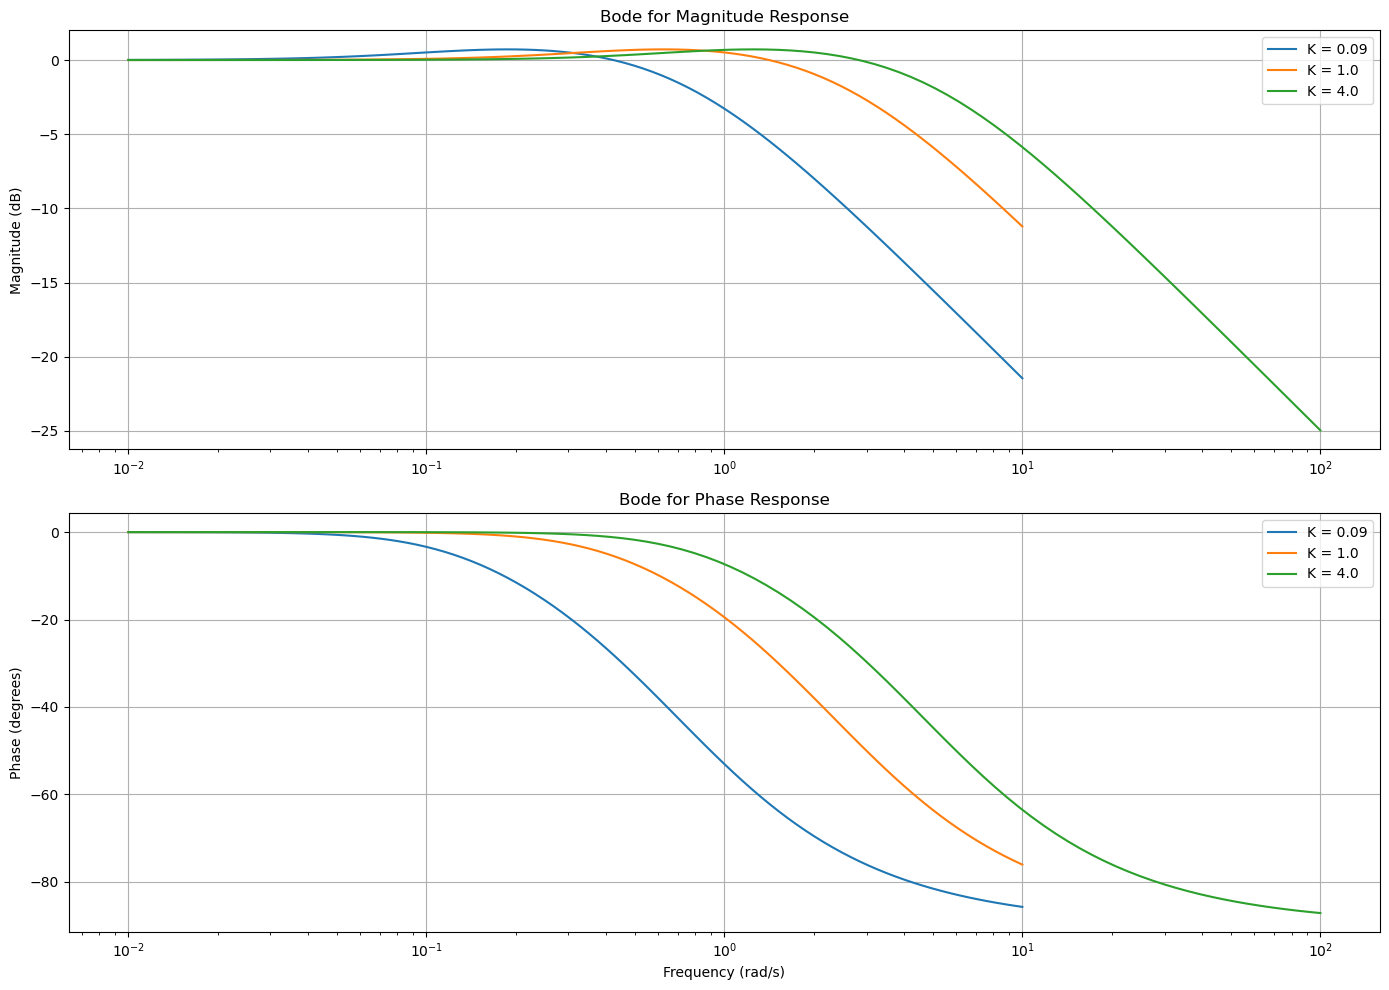

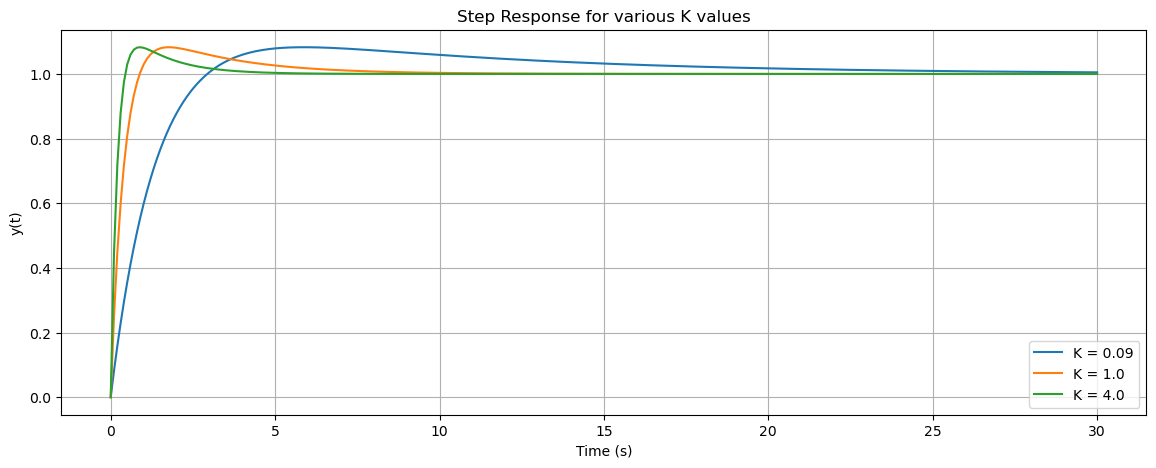

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Given parameters
zeta = np.sqrt(2)
M = 1  # Assumed to be 1 for this project

# Values of K to consider
K_values = [0.09, 1.0, 4.0]

# Create figure for Bode plots
plt.figure(figsize=(14, 10))

# Loop through each K value to compute and plot the Bode plot
for K in K_values:
    omega_n = np.sqrt(K / M)
    num = [2 * zeta * omega_n, omega_n**2 ]  # Numerator coefficients
    den = [1, 2 * zeta * omega_n, omega_n**2  ]  # Denominator coefficients
    system = signal.TransferFunction(num, den)

    # Compute Bode plot
    w, mag, phase = signal.bode(system)

    # Plot magnitude response
    plt.subplot(2, 1, 1)
    plt.semilogx(w, mag, label=f'K = {K}')
    plt.title('Bode for Magnitude Response')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.legend()

    # Plot phase response
    plt.subplot(2, 1, 2)
    plt.semilogx(w, phase, label=f'K = {K}')
    plt.title('Bode for Phase Response')
    plt.ylabel('Phase (degrees)')
    plt.xlabel('Frequency (rad/s)')
    plt.grid(True)
    plt.legend()


plt.tight_layout()
plt.show()

# Step response analysis
plt.figure(figsize=(14, 5))
for K in K_values:
    omega_n = np.sqrt(K / M)
    num = [2 * zeta * omega_n, omega_n**2]
    den = [1, 2 * zeta * omega_n, omega_n**2]
    system = signal.TransferFunction(num, den)
    t, y = signal.step(system, T=np.linspace(0, 30, 300))

    plt.plot(t, y, label=f'K = {K}')
    plt.legend()

plt.title('Step Response for various K values')
plt.xlabel('Time (s)')
plt.ylabel('y(t)')
plt.grid(True)

plt.show()


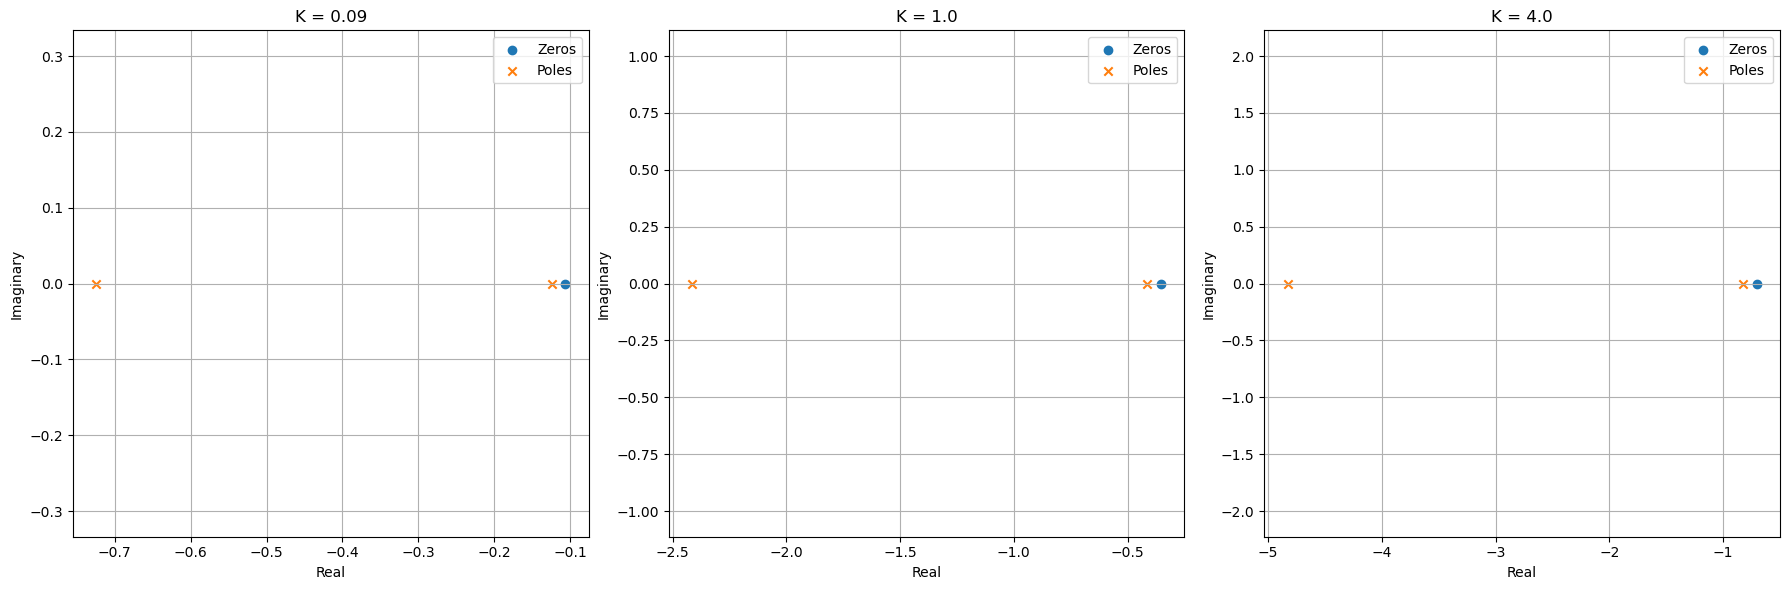

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Create figure for plots
plt.figure(figsize=(18, 6))
# Loop through each K value to plot the pole-zero map
for i, K in enumerate(K_values):
    omega_n = np.sqrt(K / M)  # Natural frequency
    num = [ 2 * zeta * omega_n, omega_n**2   ]  # Numerator coefficients
    den = [ 1, 2 * zeta * omega_n, omega_n**2  ]  # Denominator coefficients

    # Compute zeros and poles
    zeros = np.roots(num)
    poles = np.roots(den)


    # Plot the pole-zero map
    plt.subplot(1, 3, i+1)
    plt.scatter(np.real(zeros), np.imag(zeros), marker='o', label='Zeros')
    plt.scatter(np.real(poles), np.imag(poles), marker='x', label='Poles')
    plt.title(f'K = {K}')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.grid(True)
    plt.legend()
    plt.axis('equal')

plt.tight_layout()
plt.show()


You can answer the remaining part of c) below:

We can see that rise time decreases with increasing K (Higher $ \omega_n$) and in terms of freq. response, higher $ \omega_n$ shifts the cutoff frequency right and enables faster response.

Also, small $ \omega_n$ and lower K reacts slowly but filters high-frequency road noise better.

So, best ride can be felt with K = 1 since it causes good balance between responsiveness and smoothness.

# ECE 321 Lab 6 Check-Off Sheet

Name:
Lab Section:

For Problem 1 in Section 2, show your pole-zero plots and the frequency response figures. Explain how
you determine the filter characteristics based on the pole-zero plots.

As explained in those question, if poles are on the Left Hand Side of the s-plane, the filter is Stable. If on the other hand, poles are on Right Hand Side of the s-plane, the filter has positive real values for poles which makes it Unstable.

Automobile suspension systems are typically designed with a specific mass in mind. For instance, we
have assumed $M = 1$ in Problem 2, and the $K$ and $B$ parameters have been chosen accordingly to
offer a good ride to passengers. Suppose that someone loads up the car with several boxes of ECE
321 textbooks, which will obviously change the mass. In your opinion, how will it change the system
behavior?



Loads car means M increeases and based on natural frequency formula, $ \omega_n = \sqrt{\frac{K}{M}} $, $ \omega_n $ decreases because M is in the denominator.

A smaller $ \omega_n $ shifts the frequency response to lower frequencies and thus system becomes less responsive to higher-frequency road bumps. Also, rise time increases because the system reacts more slowly to input changes. Finally, in terms of comfort, decrease in $ \omega_n $ improves comfort on smooth roads since system attenuates high-frequency disturbances.

TA signature and date:

TA comments: